In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('default')
#plt.style.use('dark_background')

In [53]:
cust_df = pd.read_csv('../input/cust_segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [54]:
df = cust_df.drop('Address', axis=1)

In [55]:
df.shape

(850, 9)

In [56]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [57]:
X = df.values[:, 1:]  # Customer Id -> exclude and put values in X
X = np.nan_to_num(X)  # replace nan -> 0
X[:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        0.000e+00, 1.280e+01],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        1.000e+00, 2.090e+01],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        0.000e+00, 7.200e+00]])

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

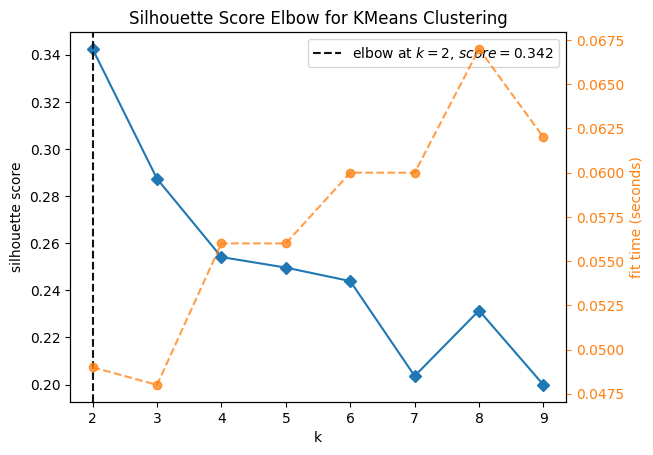

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [59]:
model = KMeans(init='k-means++', n_init=12, random_state=0)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')
visualizer.fit(X_scaled)
visualizer.show()

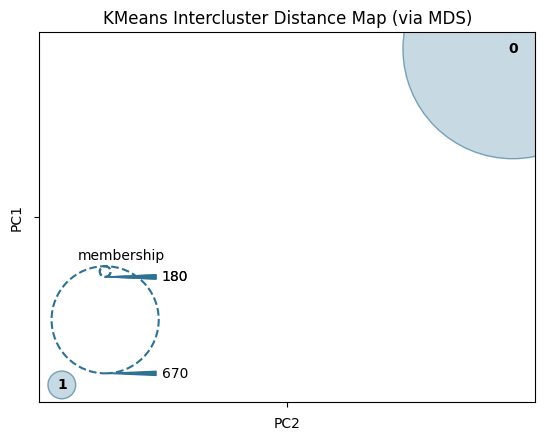

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [60]:
best_num = 2

model = KMeans(init='k-means++', n_clusters=best_num, n_init=12, random_state=0)
visualizer = InterclusterDistance(model)
visualizer.fit(X_scaled)
visualizer.show()

In [61]:
cluster_labels = visualizer.fit_predict(X)
#df['KMeans'] = cluster_labels

In [ ]:
df.groupby(['KMeans']).mean()

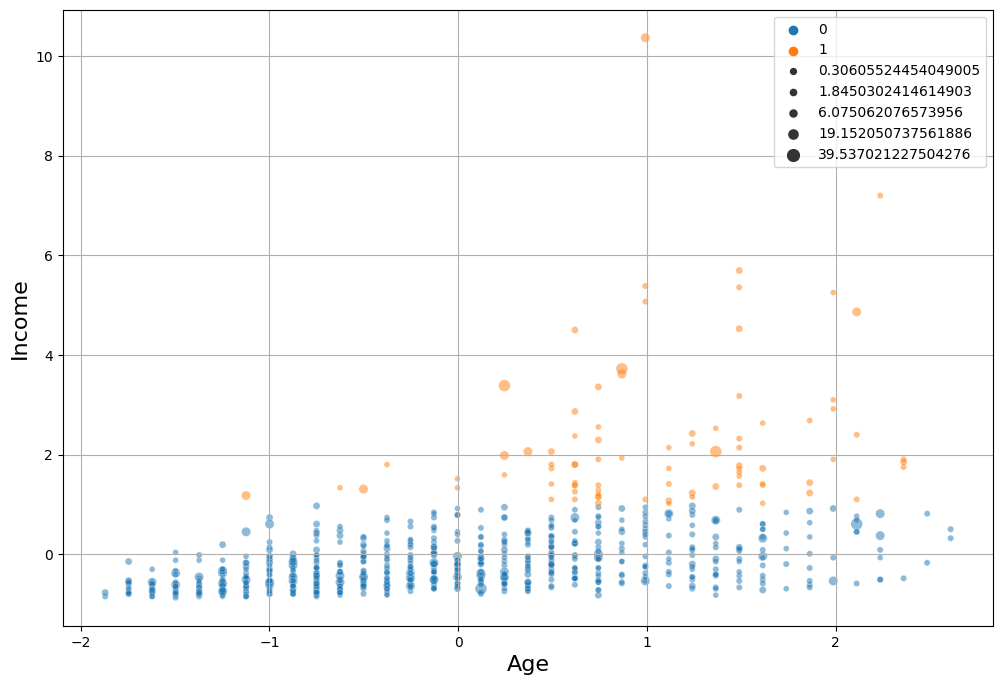

In [63]:
# dependence age/income

plt.figure(figsize=(12, 8))
area = np.pi * (X_scaled[:, 1])**2

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 3], hue=cluster_labels, alpha=.5, size=area)

plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

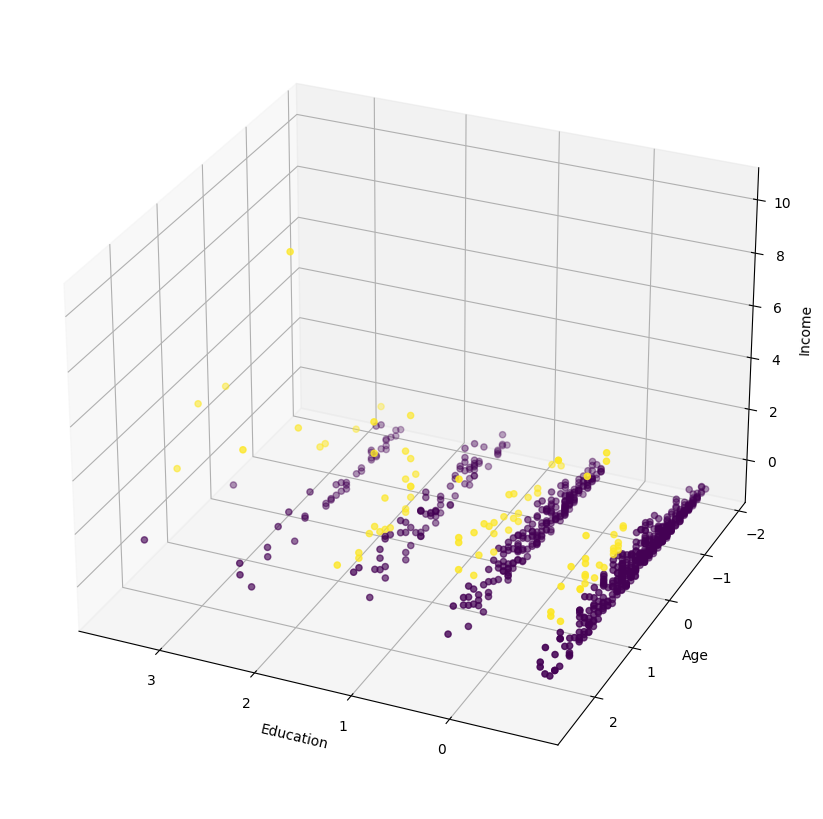

In [64]:
plt.clf()

fig = plt.figure(figsize=(10, 8))

ax = Axes3D(fig, auto_add_to_figure=False, rect=(0, 0, 0.8, 1), elev=28, azim=114)
fig.add_axes(ax)

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X_scaled[:, 1], X_scaled[:, 0], X_scaled[:, 3], c=cluster_labels)
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, cluster_labels, test_size=.25, random_state=0)

In [83]:
clf =MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [84]:
print(f'Currency: {classification_report(y_pred, y_test)}')
print(confusion_matrix(y_pred, y_test))

Currency:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       179
           1       0.95      0.62      0.75        34

    accuracy                           0.93       213
   macro avg       0.94      0.81      0.86       213
weighted avg       0.94      0.93      0.93       213

[[178   1]
 [ 13  21]]
